In [1]:
import numpy as np
import matplotlib.pyplot as plt
from lefs_cython.simple import LEFSimulator, constants
import lefs_cython
lefs_cython.LEFSimulator = LEFSimulator
colors = [
    'red', 'green', 'blue', 'orange', 'purple', 'brown', 'pink', 'gray', 'cyan', 
    'magenta', 'yellow', 'black', 'lime', 'teal', 'navy'
]

def calculate_coverage(segments, L):
    # Sort the segments based on the starting point, and then by the ending point
    segments = sorted(segments, key=lambda x: (x[0], x[1]))

    merged_segments = []
    current_start, current_end = segments[0]

    for start, end in segments[1:]:
        if start <= current_end:  # There is an overlap
            current_end = max(current_end, end)
        else:  # No overlap, push the current segment to the merged list
            merged_segments.append((current_start, current_end))
            current_start, current_end = start, end
    
    # Append the last segment
    merged_segments.append((current_start, current_end))
    
    # Calculate the total coverage
    total_coverage = sum(end - start for start, end in merged_segments)
    
    return total_coverage

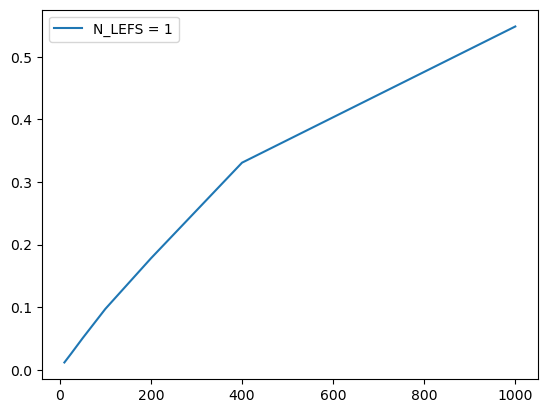

In [2]:
N = 1000
d = 500
for N_LEFS in [1]: 
    # v = 0.5 # 2 leg velocity
    r_u = 1/400 
    coverages = []
    for r_u in 1/np.array([1000,400, 200,100, 50, 25, 10]):
        processivity = 1/(r_u*2)
        LEF_steps = 100000
        steps_per_LEF_step = int(5200/2)
        load_array = 1 * np.ones((N, 5))
        unload_array = np.ones((N, 5))/(processivity)  # 200 steps to unload
        capture_array = np.zeros((N, 2))  # no CTCF
        release_array = np.zeros(N)
        pause_array = np.zeros(N)  # no pausing
        right_positions = []
        LEF = LEFSimulator(N_LEFS, N, load_array, unload_array, capture_array, release_array, pause_array, skip_load=True)
        positions = []
        for k in range(LEF_steps):
            LEF.steps(k,k+1)
            LEF.get_LEFs()
            positions.append(LEF.get_LEFs())
        positions = np.array(positions) 
        # for k in range(N_LEFS):
        #     # plt.plot(positions[:,k,:], color = colors[k] )
        # plt.show()
        total_coverage = []
        for k in range(LEF_steps):
            coverage = calculate_coverage(positions[k,:,:], N)
            total_coverage.append(coverage)
        total_coverage = np.array(total_coverage)
        coverages.append(total_coverage)
        # plt.plot(total_coverage)
        # plt.show()
        # print(total_coverage.mean())
        # plt.hist(total_coverage)
    coverages = np.array(coverages)
    plt.plot(np.array([1000,400, 200,100, 50, 25, 10]), coverages.mean(axis=1)/N, label = f'N_LEFS = {N_LEFS}')
    plt.legend()

In [3]:
import numpy as np

def calculate_coverage_within_subset(segments, l1, l2):
    # Filter and adjust segments to be within [l1, l2]
    adjusted_segments = []
    for start, end in segments:
        if end < l1 or start > l2:
            continue  # Skip segments that are completely outside [l1, l2]
        adjusted_start = max(start, l1)
        adjusted_end = min(end, l2)
        adjusted_segments.append((adjusted_start, adjusted_end))
    
    if not adjusted_segments:
        return 0
    
    # Sort the adjusted segments by their starting points; if they are the same, sort by their ending points
    adjusted_segments = sorted(adjusted_segments, key=lambda x: (x[0], x[1]))
    
    merged_segments = []
    current_start, current_end = adjusted_segments[0]
    
    for start, end in adjusted_segments[1:]:
        if start <= current_end:  # There is an overlap
            current_end = max(current_end, end)
        else:  # No overlap, add the previous segment to merged segments
            merged_segments.append((current_start, current_end))
            current_start, current_end = start, end
    
    # Add the last segment
    merged_segments.append((current_start, current_end))
    
    # Calculate the total coverage within [l1, l2]
    total_coverage = sum(end - start for start, end in merged_segments)
    
    return total_coverage

# Example usage
segments = np.array([
    [1, 3],
    [4, 6],
    [5, 8],
    [10, 12]
])
l1, l2 = 4, 10

total_coverage_within_subset = calculate_coverage_within_subset(segments, l1, l2)
print("Total Coverage within subset [4, 10]:", total_coverage_within_subset)


Total Coverage within subset [4, 10]: 4


ValueError: x and y must have same first dimension, but have shapes (7,) and (1,)

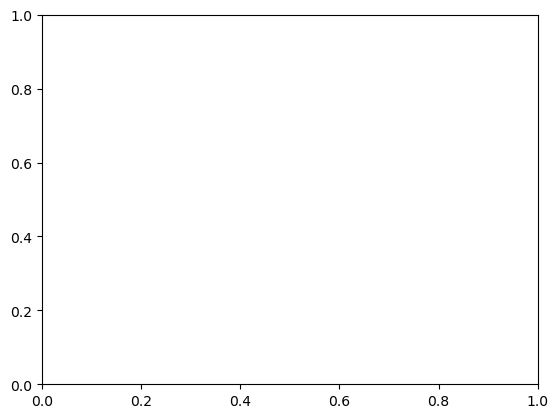

In [11]:
for N_LEFS in [1]: 
    # v = 0.5 # 2 leg velocity
    r_u = 1/400 
    coverages = []
    for r_u in 1/np.array([200]):
        processivity = 1/(r_u*2)
        LEF_steps = 10000
        steps_per_LEF_step = int(5200/2)
        load_array = 1 * np.ones((N, 5))
        unload_array = np.ones((N, 5))/(processivity)  # 200 steps to unload
        capture_array = np.zeros((N, 2))  # no CTCF
        release_array = np.zeros(N)
        pause_array = np.zeros(N)  # no pausing
        right_positions = []
        LEF = LEFSimulator(N_LEFS, N, load_array, unload_array, capture_array, release_array, pause_array, skip_load=True)
        positions = []
        for k in range(LEF_steps):
            LEF.steps(k,k+1)
            LEF.get_LEFs()
            positions.append(LEF.get_LEFs())
        positions = np.array(positions) 
        total_coverage = []
        for k in range(LEF_steps):
            coverage = calculate_coverage_within_subset(positions[k,:,:], 250, 250+360)
            total_coverage.append(coverage)
        total_coverage = np.array(total_coverage)
        coverages.append(total_coverage)
    coverages = np.array(coverages)
    plt.plot(np.array([1000,400, 200,100, 50, 25, 10]), coverages.mean(axis=1)/N, label = f'N_LEFS = {N_LEFS}')
    plt.legend()

In [14]:
3000/400

7.5

[0.22856857]


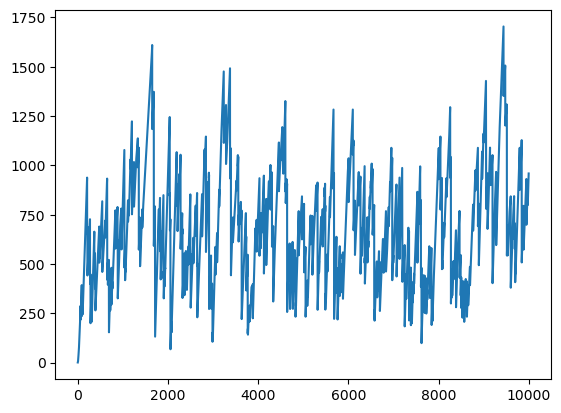

In [17]:
N = 3000
for N_LEFS in [4]: 
    # v = 0.5 # 2 leg velocity
    r_u = 1/800 
    coverages = []
    for r_u in 1/np.array([200]):
        processivity = 1/(r_u*2)
        LEF_steps = 10000
        steps_per_LEF_step = int(5200/2)
        load_array = 1 * np.ones((N, 5))
        unload_array = np.ones((N, 5))/(processivity)  # 200 steps to unload
        capture_array = np.zeros((N, 2))  # no CTCF
        release_array = np.zeros(N)
        pause_array = np.zeros(N)  # no pausing
        right_positions = []
        LEF = LEFSimulator(N_LEFS, N, load_array, unload_array, capture_array, release_array, pause_array, skip_load=True)
        positions = []
        for k in range(LEF_steps):
            LEF.steps(k,k+1)
            LEF.get_LEFs()
            positions.append(LEF.get_LEFs())
        positions = np.array(positions) 
        total_coverage = []
        for k in range(LEF_steps):
            coverage = calculate_coverage_within_subset(positions[k,:,:], 250, 250+360)
            coverage = calculate_coverage(positions[k,:,:], N)
            total_coverage.append(coverage)
        total_coverage = np.array(total_coverage)
        coverages.append(total_coverage)
    coverages = np.array(coverages)
    print(coverages.mean(axis=1)/N)
    plt.plot(total_coverage)